In [194]:
#必要なライブラリをインポート
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import np_utils 

In [195]:
#X,y作成
X = np.empty((0, 128, 128, 3))
y = np.empty((0, 1))

for i in [1,5,10,50,100,500]:
    for j in range (10):
        for k in range (10):
            img = cv2.imread('coin_out_128/%dyen/%d%d.jpg'%(i,j,k))
            img = np.array([img])

            X = np.concatenate((X, img), axis=0)
            y = np.concatenate((y, [[i]]), axis=0)
            
    print('%d円終了'%i)

print(X.shape)
print(y.shape)

1円終了
5円終了
10円終了
50円終了
100円終了
500円終了
(600, 128, 128, 3)
(600, 1)


In [196]:
#正規化
X_nor = X.astype('f')/256

In [197]:
#one-hot表現に変換
y_oh = y

y_oh = np.where(y == 1, 0, y_oh)
y_oh = np.where(y == 5, 1, y_oh)
y_oh = np.where(y == 10, 2, y_oh)
y_oh = np.where(y == 50, 3, y_oh)
y_oh = np.where(y == 100, 4, y_oh)
y_oh = np.where(y == 500, 5, y_oh)

y_oh = np_utils.to_categorical(y_oh, num_classes=6).astype('i') 
y_oh

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]], dtype=int32)

In [198]:
#train用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X_nor, y_oh, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(420, 128, 128, 3)
(180, 128, 128, 3)
(420, 6)
(180, 6)


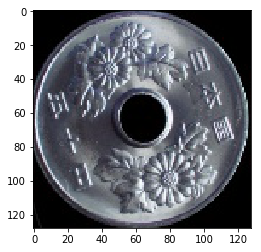

[0 0 0 1 0 0]


In [199]:
#trainデータの確認
index = 0
img = X_train[index]
plt.imshow(img)
plt.show()
print(y_train[index])

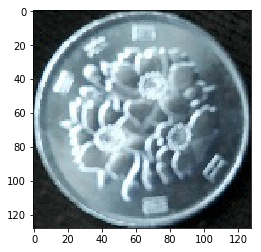

[0 0 0 0 1 0]


In [200]:
#testデータの確認
index = 0
img = X_test[index]
plt.imshow(img)
plt.show()
print(y_test[index])

In [201]:
#モデルの生成に必要なライブラリをインポート
import keras
# 層構造のモデルを定義するためのメソッド
from keras.models import Sequential
# Denseは層の生成メソッド、Activationは活性化関数を定義するためのメソッド
from keras.layers import Dense, Activation
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers import Flatten
from keras.optimizers import SGD
import tensorflow as tf

In [202]:
#モデルの生成
model = Sequential()

model.add(Conv2D(filters=64, input_shape=(128, 128, 3), kernel_size=(8, 8), strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(filters=128, kernel_size=(4, 4), strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(filters=128, kernel_size=(4, 4), strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(6))
model.add(Activation('softmax'))

In [203]:
#学習の実行
model.compile(loss='categorical_crossentropy',optimizer=SGD(0.01),metrics=['accuracy'])

batch_size = 10
n_epoch = 30

hist = model.fit(X_train,y_train,epochs=n_epoch,validation_data=(X_test, y_test),verbose=1,batch_size=batch_size)

Train on 420 samples, validate on 180 samples
Epoch 1/30
420/420 [==============================] - 28s 66ms/step - loss: 1.7631 - acc: 0.2310 - val_loss: 1.7487 - val_acc: 0.3111
Epoch 2/30
420/420 [==============================] - 26s 63ms/step - loss: 1.6784 - acc: 0.2738 - val_loss: 1.5260 - val_acc: 0.5111
Epoch 3/30
420/420 [==============================] - 26s 63ms/step - loss: 1.5258 - acc: 0.4119 - val_loss: 1.6294 - val_acc: 0.2722
Epoch 4/30
420/420 [==============================] - 26s 63ms/step - loss: 1.4196 - acc: 0.4214 - val_loss: 1.1373 - val_acc: 0.5444
Epoch 5/30
420/420 [==============================] - 24s 57ms/step - loss: 1.2848 - acc: 0.5143 - val_loss: 0.9934 - val_acc: 0.7111
Epoch 6/30
420/420 [==============================] - 25s 59ms/step - loss: 1.0721 - acc: 0.6310 - val_loss: 0.9122 - val_acc: 0.6833
Epoch 7/30
420/420 [==============================] - 24s 56ms/step - loss: 0.8988 - acc: 0.6810 - val_loss: 0.6472 - val_acc: 0.7833
Epoch 8/30
420/4

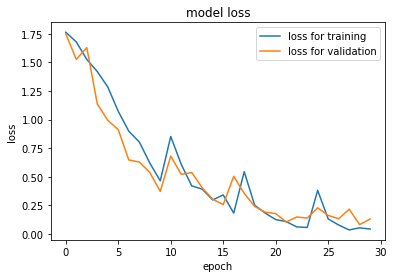

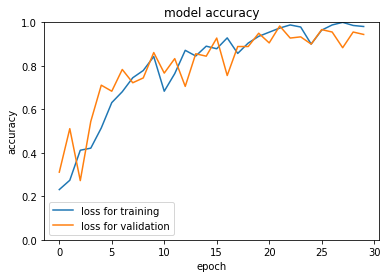

In [204]:
#性能確認
def plot_history_loss(hist):
    # 損失値(Loss)の遷移のプロット
    plt.plot(hist.history['loss'],label="loss for training")
    plt.plot(hist.history['val_loss'],label="loss for validation")
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='best')
    plt.show()

def plot_history_acc(hist):
    # 精度(Accuracy)の遷移のプロット
    plt.plot(hist.history['acc'],label="loss for training")
    plt.plot(hist.history['val_acc'],label="loss for validation")
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc='best')
    plt.ylim([0, 1])
    plt.show()

plot_history_loss(hist)
plot_history_acc(hist)

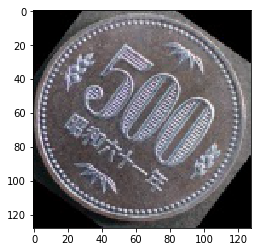

predict:  0
answer :  5


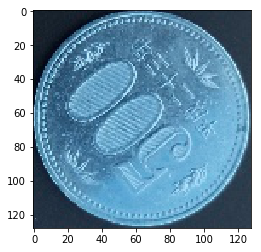

predict:  2
answer :  5


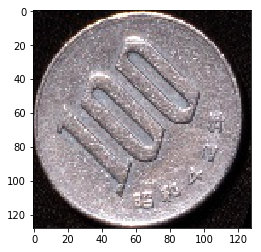

predict:  0
answer :  4


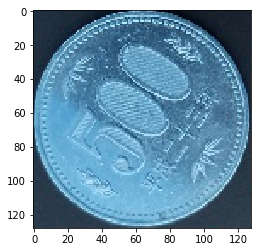

predict:  2
answer :  5


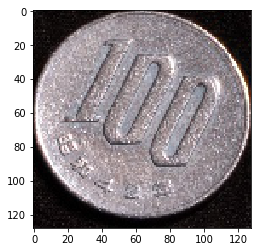

predict:  0
answer :  4


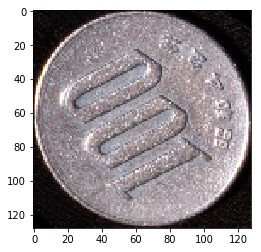

predict:  0
answer :  4


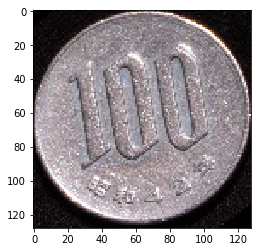

predict:  0
answer :  4


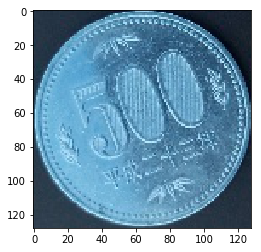

predict:  2
answer :  5


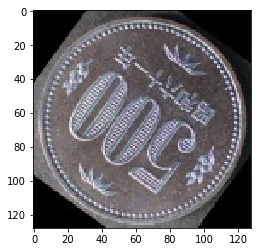

predict:  0
answer :  5


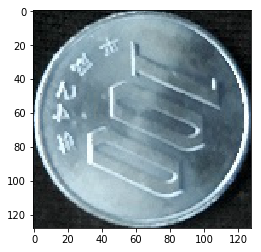

predict:  5
answer :  4


In [205]:
#間違えた画像を表示
def miss_show(X,y):
    #index = 30
    for index in range(X.shape[0]):       
        pred = model.predict(X[index].reshape(1, 128, 128,3)).argmax()
        ans  = y[index].argmax()
        
        if pred != ans:
            plt.imshow(X[index])
            plt.show()

            print('predict: ', pred)
            print('answer : ', ans)

miss_show(X_test,y_test)

In [206]:
#画像からコインを抽出する関数を定義
def cut(in_img):
    img = cv2.imread(in_img)
    
    plt.imshow(img)
    plt.show()
    
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_img = cv2.GaussianBlur(gray_img, (7,7), 0)
    ret, bw_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_OTSU)

    imgEdge, contours, hierarchy = cv2.findContours(bw_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    ROUNDNESS_THRESH = 0.9
    coin_list = []
    for contour in contours:
        x, y, width, height = cv2.boundingRect(contour)
        area = cv2.contourArea(contour)
        longAx = width
        if (width < height):
            longAx = height
        roundness = (4*area)/(math.pi*(longAx**2)) # it seems like a circle closer to 1.0

        if (roundness > ROUNDNESS_THRESH):
            coin_list.append(roundness)
            topleft = x
            
            cut_img = img[y:y+longAx, x:x+longAx]
            
            cut_img2 = cv2.resize(cut_img , (128, 128))
            
            plt.imshow(cut_img2)
            plt.show()
            
            cv2.imwrite('result%d.jpg'%(len(coin_list)), cut_img2)
            cv2.rectangle(img, (x, y), (x+width, y+height), (0, 0, 200), 2)
            
    plt.imshow(img)
    plt.show()
    cv2.imwrite('sample_result.jpg', img)
    
    return len(coin_list)

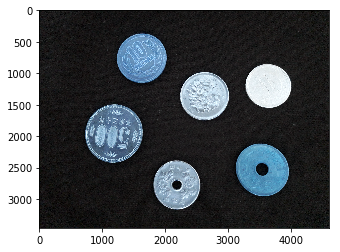

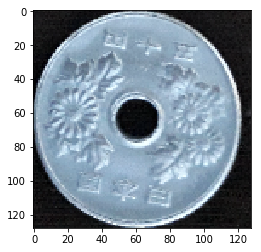

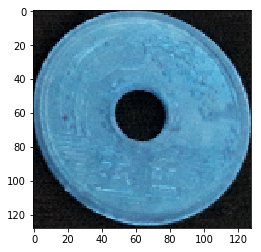

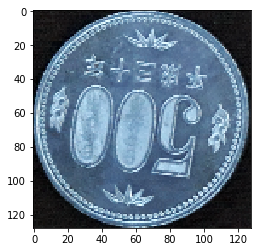

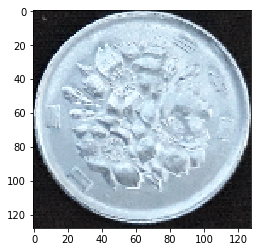

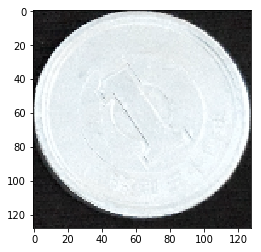

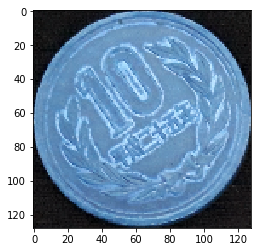

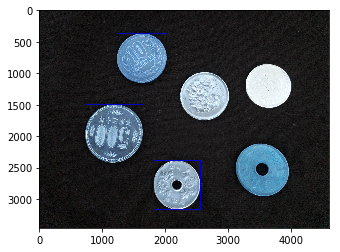

6枚の硬貨があります。


In [207]:
#画像を入力
N = cut('sample.jpg')
print('%d枚の硬貨があります。'%N)

In [208]:
#X作成
in_X = np.empty((0, 128, 128, 3))

for i in range(N):
    img = cv2.imread('result%d.jpg'%(i+1))
    img = np.array([img])
    in_X = np.concatenate((in_X, img), axis=0)

print(in_X.shape)

(6, 128, 128, 3)


In [209]:
#予測
y = np.empty((0, 1))

for index in range(N):
    pred = model.predict(in_X[index].reshape(1, 128, 128,3)).argmax()
    y = np.concatenate((y, [[pred]]), axis=0)

print(y)

y = np.where(y == 5, 500, y)
y = np.where(y == 4, 100, y)
y = np.where(y == 3, 50, y)
y = np.where(y == 2, 10, y)
y = np.where(y == 1, 5, y)
y = np.where(y == 0, 1, y)

print(y)

[[3.]
 [1.]
 [5.]
 [4.]
 [0.]
 [2.]]
[[ 50.]
 [  5.]
 [500.]
 [100.]
 [  1.]
 [ 10.]]


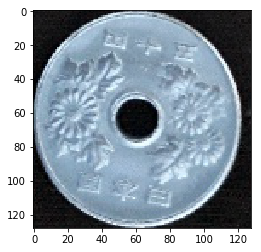

これは50円です


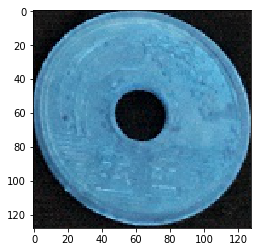

これは5円です


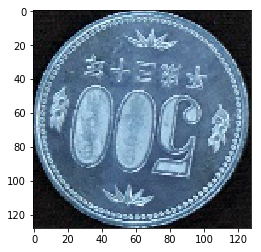

これは500円です


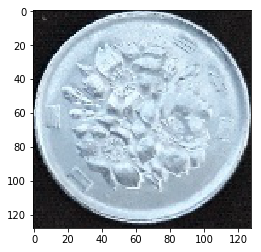

これは100円です


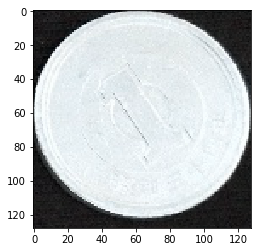

これは1円です


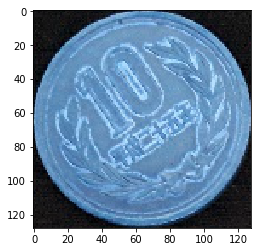

これは10円です
全部で666円です


In [210]:
#予測を出力
sum = 0

for index in range(N):
    plt.imshow(in_X[index]/256)
    plt.show()
    print('これは%d円です'%y[index])
    sum = sum + y[index]
    
print('全部で%d円です'%sum)